In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [4]:
# Download historical stock price data of Crédit Suisse from Yahoo Finance
ticker = "CSGN.SW"  # Crédit Suisse ticker symbol on yfi
start_date = "1997-11-13"  # Date of first trading day of Crédit Suisse
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")  # Date du jour
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


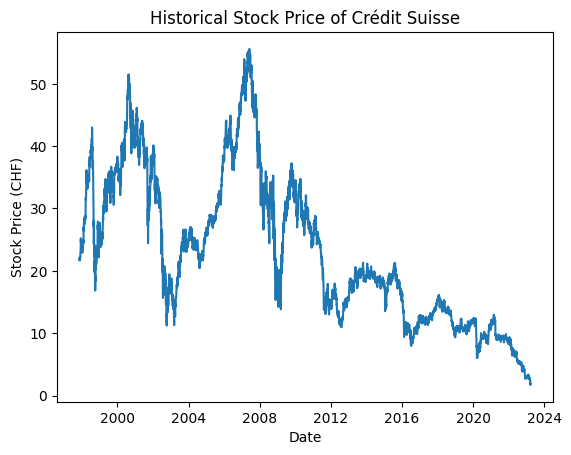

                                Open       High        Low      Close  \
Date                                                                    
1997-11-13 00:00:00+01:00  45.801186  46.524616  45.355976  45.578533   
1997-11-14 00:00:00+01:00  46.079407  46.190735  45.300312  45.578533   
1997-11-17 00:00:00+01:00  46.246395  46.468956  46.023746  46.246395   
1997-11-18 00:00:00+01:00  46.190735  46.635944  46.135071  46.468956   
1997-11-19 00:00:00+01:00  46.357628  46.580280  45.968082  46.468956   
...                              ...        ...        ...        ...   
2023-03-13 00:00:00+01:00   2.517000   2.517000   2.115000   2.257000   
2023-03-14 00:00:00+01:00   2.170000   2.303000   2.120000   2.240000   
2023-03-15 00:00:00+01:00   2.280000   2.290000   1.550000   1.697000   
2023-03-16 00:00:00+01:00   2.250000   2.250000   1.900000   2.022000   
2023-03-17 00:00:00+01:00   2.050000   2.087000   1.767000   1.860000   

                           Adj Close     Volume  


In [5]:
# Create a plot of the historical stock price data
fig, ax = plt.subplots()
ax.plot(data["Adj Close"])
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price (CHF)")
ax.set_title("Historical Stock Price of Crédit Suisse")
plt.show()

# Print the historical stock price data
print(data)


In [1]:
# Download historical stock price data of Crédit Suisse from Yahoo Finance
ticker = "CSGN.SW"  # Crédit Suisse ticker symbol on yfi
start_date = "1997-11-13"  # Date of first trading day of Crédit Suisse
end_date = pd.Timestamp.today().strftime("%Y-%m-%d")  # Current date
data = yf.download(ticker, start=start_date, end=end_date)

# Prepare the data for prediction
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
split = int(0.8 * len(data))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# Fit a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)


[*********************100%***********************]  1 of 1 completed
Mean squared error:  0.006376843794908885


In [3]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 515.9 kB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 kB 681.7 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\sitra\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import statsmodels.api as sm
# Create a dataframe of the adjusted close price
df = pd.DataFrame(data["Adj Close"])

# Add a column of the logarithmic returns
df["log_returns"] = np.log(df["Adj Close"]).diff()

df = df.dropna()
X = sm.add_constant(df["log_returns"].shift(1).values)
y = df["log_returns"].values

# Fit the OLS regression model....... and it doesn't work.
model = sm.OLS(y, X).fit()
print(model.summary())
